In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from src.utils import get_kfold_data, print_statistics, plot_distribution, convert_non_numeric_to_numeric
from src.constants import *

Load data

In [2]:
data = pd.read_csv(DATA_PATH)

In [3]:
data.head()

,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [4]:
data.columns

Index(['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3',
       'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9',
       'b10'],
      dtype='object')

In [5]:
# Find columns
all_columns = data.columns.tolist()
print(all_columns)

numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
numeric_columns.remove("outcome") # Remove the target column
print(numeric_columns)

non_numeric_columns = data.select_dtypes(exclude=["number"]).columns.tolist()
print(non_numeric_columns)

['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['cut', 'color', 'clarity']


In [6]:
print(data["cut"].value_counts())

cut
Ideal        4040
Premium      2439
Very Good    2296
Good          925
Fair          300
Name: count, dtype: int64


In [7]:
print(data["clarity"].value_counts())

clarity
SI1     2408
VS2     2256
SI2     1743
VS1     1503
VVS2     951
VVS1     675
IF       318
I1       146
Name: count, dtype: int64


In [8]:
print(data["color"].value_counts())

color
G    2120
E    1873
F    1746
H    1506
D    1246
I     983
J     526
Name: count, dtype: int64


Checking for missing values

In [9]:
for column in all_columns:
    num_nan = data[column].isna().sum()
    num_none = data[column].isnull().sum()
    print(f"{column} | Number of NaN: {num_nan} | Number of None: {num_none}")

outcome | Number of NaN: 0 | Number of None: 0
carat | Number of NaN: 0 | Number of None: 0
cut | Number of NaN: 0 | Number of None: 0
color | Number of NaN: 0 | Number of None: 0
clarity | Number of NaN: 0 | Number of None: 0
depth | Number of NaN: 0 | Number of None: 0
table | Number of NaN: 0 | Number of None: 0
price | Number of NaN: 0 | Number of None: 0
x | Number of NaN: 0 | Number of None: 0
y | Number of NaN: 0 | Number of None: 0
z | Number of NaN: 0 | Number of None: 0
a1 | Number of NaN: 0 | Number of None: 0
a2 | Number of NaN: 0 | Number of None: 0
a3 | Number of NaN: 0 | Number of None: 0
a4 | Number of NaN: 0 | Number of None: 0
a5 | Number of NaN: 0 | Number of None: 0
b1 | Number of NaN: 0 | Number of None: 0
b2 | Number of NaN: 0 | Number of None: 0
b3 | Number of NaN: 0 | Number of None: 0
b4 | Number of NaN: 0 | Number of None: 0
b5 | Number of NaN: 0 | Number of None: 0
a6 | Number of NaN: 0 | Number of None: 0
a7 | Number of NaN: 0 | Number of None: 0
a8 | Number

Data statistics

In [10]:
# for column in numeric_columns:
#     print_statistics(data[column], column)

In [11]:
# Find columns
all_columns = data.columns.tolist()
print(all_columns)

numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
numeric_columns.remove("outcome") # Remove the target column
print(numeric_columns)

non_numeric_columns = data.select_dtypes(exclude=["number"]).columns.tolist()
print(non_numeric_columns)

['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['cut', 'color', 'clarity']


Plotting correlation matrix

In [12]:
data = convert_non_numeric_to_numeric(data=data)
print(data)

['G', 'E', 'F', 'H', 'D', 'I', 'J']
        outcome  carat  cut  clarity  depth  table  price     x     y     z  \
0    -26.701232   1.14    0        3   62.3   56.0   7948  6.73  6.70  4.18   
1      6.548093   0.38    1        4   60.5   59.0    898  4.69  4.66  2.83   
2      6.612562   0.50    2        5   60.7   58.0   1351  5.09  5.13  3.10   
3     -5.073562   0.70    1        5   61.2   58.0   2512  5.74  5.70  3.50   
4    -14.436557   0.83    0        6   62.4   54.0   2751  6.01  6.08  3.77   
...         ...    ...  ...      ...    ...    ...    ...   ...   ...   ...   
9995  10.718277   0.33    0        3   62.6   57.0   1002  4.42  4.40  2.76   
9996 -12.246698   1.01    4        5   69.5   55.0   4853  6.00  5.94  4.15   
9997  11.122516   0.52    2        6   57.9   61.0   1273  5.28  5.33  3.07   
9998 -24.730782   0.31    0        0   62.0   54.0    801  4.35  4.39  2.71   
9999   8.735755   0.37    2        5   59.9   59.0    649  4.68  4.70  2.81   

      ...      

In [13]:
def plot_correlation_matrix(data:pd.DataFrame):
    corr = data.corr()
    plt.figure(figsize=(40, 40))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0)
    plt.title("Correlation Matrix")
    plt.show()

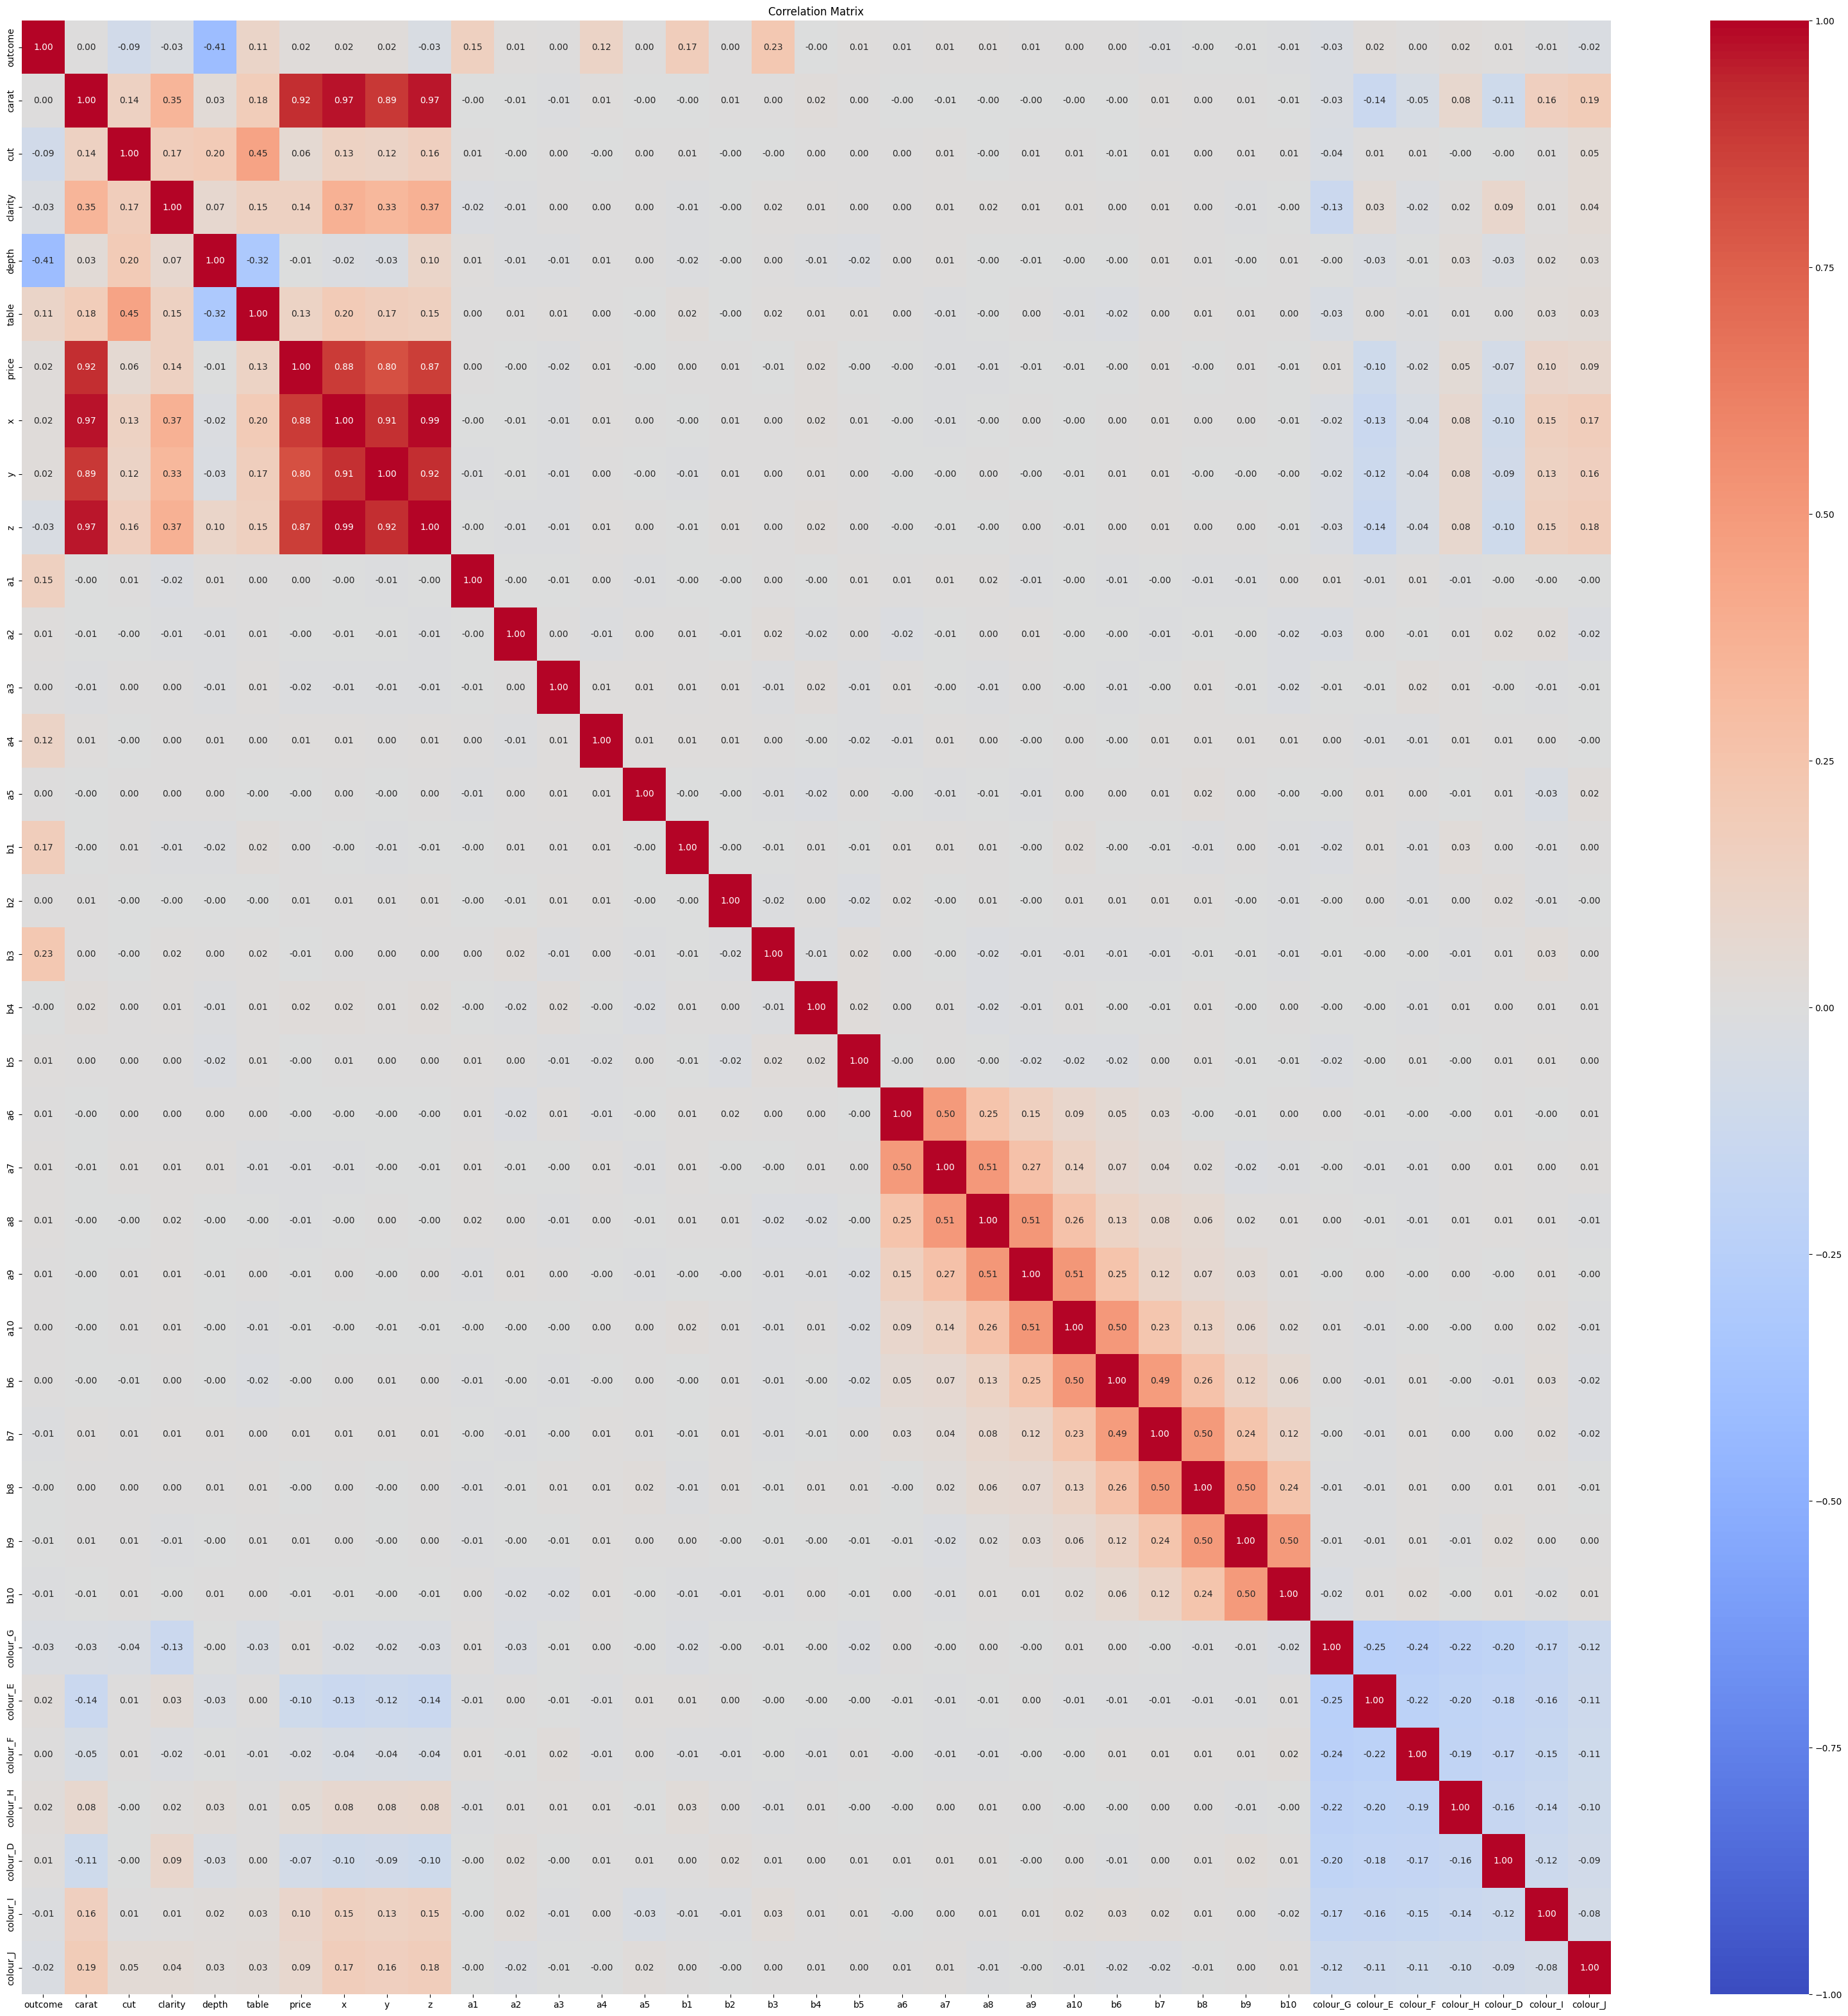

In [14]:
plot_correlation_matrix(data)

Data visualisation

In [15]:
# for column in numeric_columns:
#     plot_distribution(data[column], column, f"Distribution of {column}")

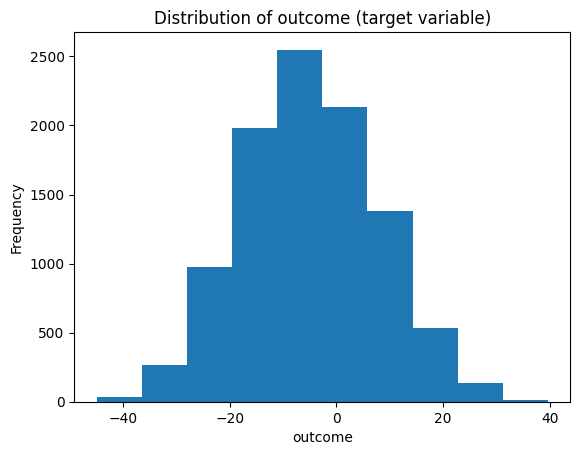

In [16]:
plot_distribution(data["outcome"], "outcome", "Distribution of outcome (target variable)")

Data splitting:
- Split the entire dataset into training and testing sets first.
- Use the training set to generate folds (one validation and the rest training folds) (K-Fold Cross Validation)

In [17]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=REPRODUCIBILITY_SEED)
print(f"Training set size: {len(train_data)} | Test set size: {len(test_data)}")    
print()

kfold_data = get_kfold_data(data=train_data, k=NUM_FOLDS, reproducibility_seed=REPRODUCIBILITY_SEED)

Training set size: 8000 | Test set size: 2000

Fold: 0/5
Train shape: (6400, 37) | 80.00%
Validation shape: (1600, 37) | 20.00%

Fold: 1/5
Train shape: (6400, 37) | 80.00%
Validation shape: (1600, 37) | 20.00%

Fold: 2/5
Train shape: (6400, 37) | 80.00%
Validation shape: (1600, 37) | 20.00%

Fold: 3/5
Train shape: (6400, 37) | 80.00%
Validation shape: (1600, 37) | 20.00%

Fold: 4/5
Train shape: (6400, 37) | 80.00%
Validation shape: (1600, 37) | 20.00%



Data normalisation (using mean, std standardisation)

Before standardization:


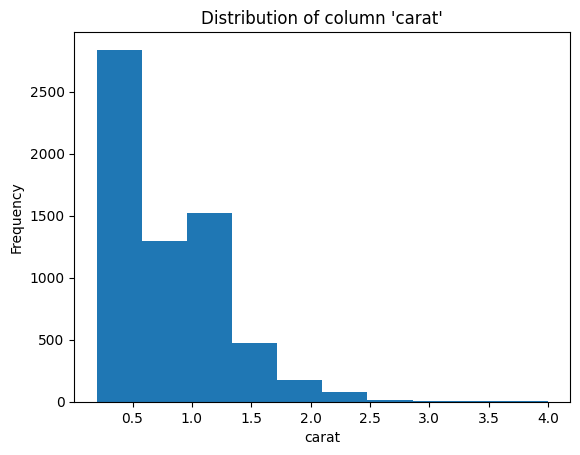

Statistics for column: carat
Mean: 0.7928171875000001
Median: 0.7
Standard Deviation: 0.4680533456582028
Minimum Value: 0.2
Maximum Value: 4.0

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


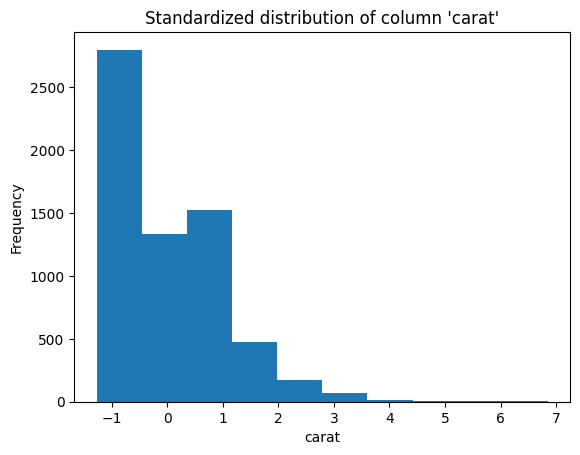

Statistics for column: carat
Mean: -1.534883331544279e-16
Median: -0.1983047154303069
Standard Deviation: 0.9999999786349143
Minimum Value: -1.266558994468371
Maximum Value: 6.852173526220916

Before standardization:


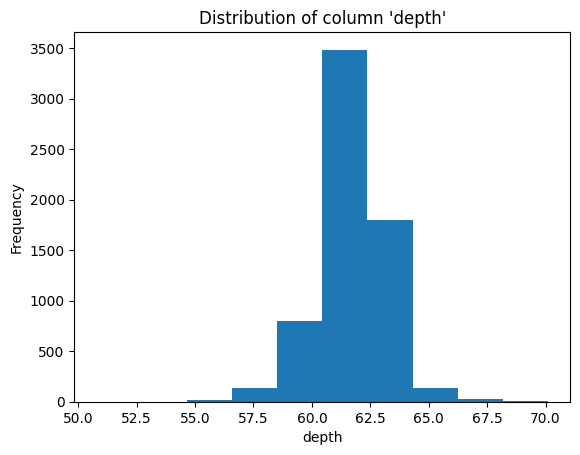

Statistics for column: depth
Mean: 61.752578125
Median: 61.9
Standard Deviation: 1.43088504588026
Minimum Value: 50.8
Maximum Value: 70.1

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


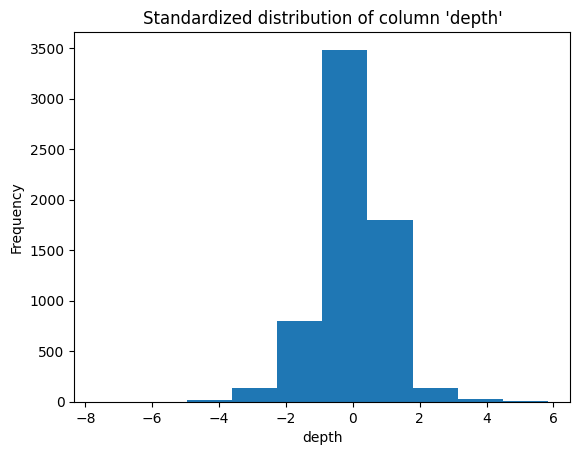

Statistics for column: depth
Mean: 3.3084646133829665e-16
Median: 0.10302845388884667
Standard Deviation: 0.9999999930113185
Minimum Value: -7.654408074212595
Maximum Value: 5.833747330504322

Before standardization:


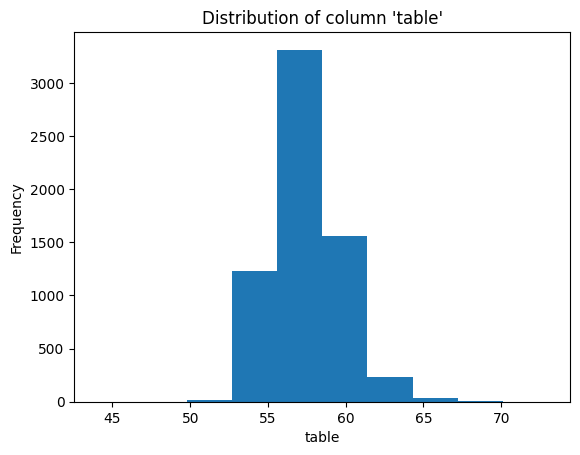

Statistics for column: table
Mean: 57.423234375
Median: 57.0
Standard Deviation: 2.241340232932535
Minimum Value: 44.0
Maximum Value: 73.0

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


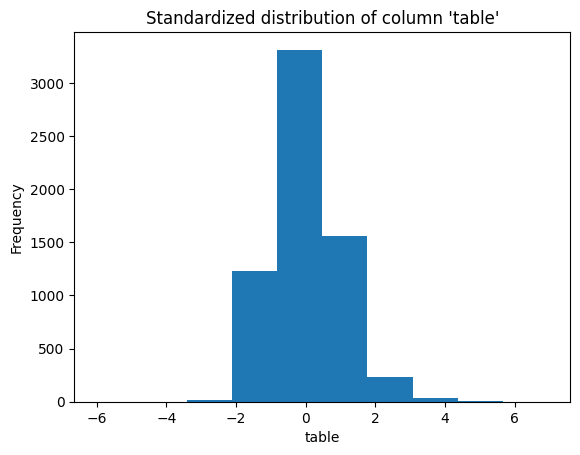

Statistics for column: table
Mean: 5.911937606128958e-17
Median: -0.18883093556837516
Standard Deviation: 0.9999999955383839
Minimum Value: -5.988932031772761
Maximum Value: 6.949755028990868

Before standardization:


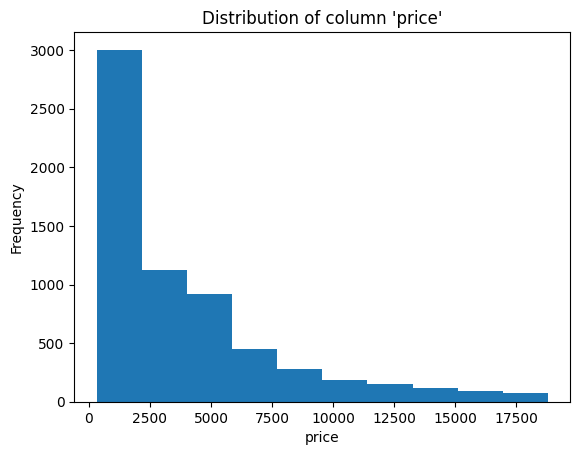

Statistics for column: price
Mean: 3854.668125
Median: 2434.5
Standard Deviation: 3863.5954598051885
Minimum Value: 334
Maximum Value: 18791

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


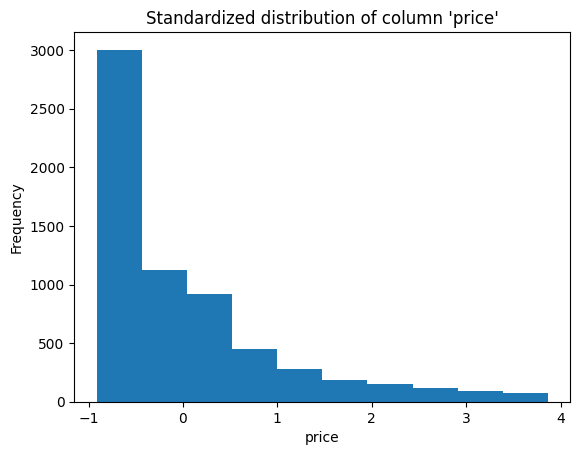

Statistics for column: price
Mean: -3.858025010572419e-17
Median: -0.36757681795907604
Standard Deviation: 0.999999999997412
Minimum Value: -0.9112413971954528
Maximum Value: 3.8659150602983847

Before standardization:


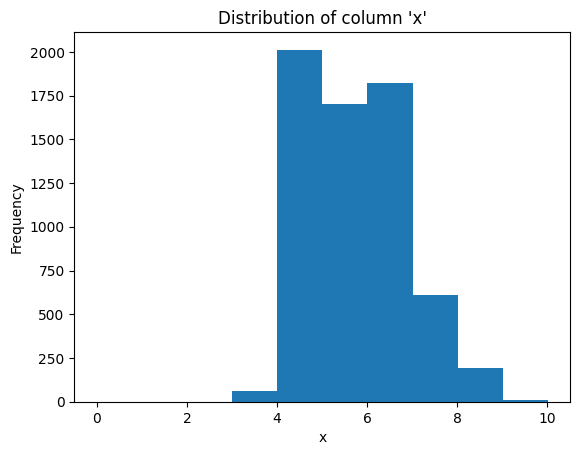

Statistics for column: x
Mean: 5.722046875000001
Median: 5.69
Standard Deviation: 1.1093093398279492
Minimum Value: 0.0
Maximum Value: 10.01

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


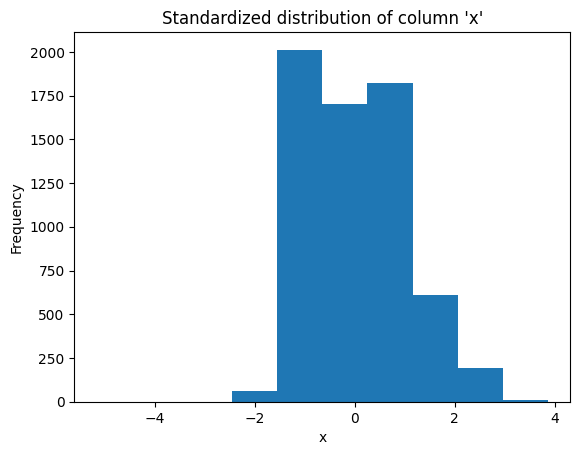

Statistics for column: x
Mean: -9.776901510605285e-16
Median: -0.028889033527907323
Standard Deviation: 0.999999990985382
Minimum Value: -5.158206658843608
Maximum Value: 3.8654259298049265

Before standardization:


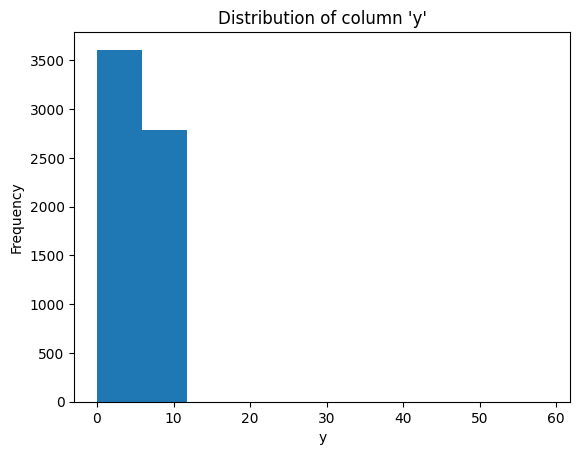

Statistics for column: y
Mean: 5.7334828125
Median: 5.71
Standard Deviation: 1.286408391283809
Minimum Value: 0.0
Maximum Value: 58.9

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


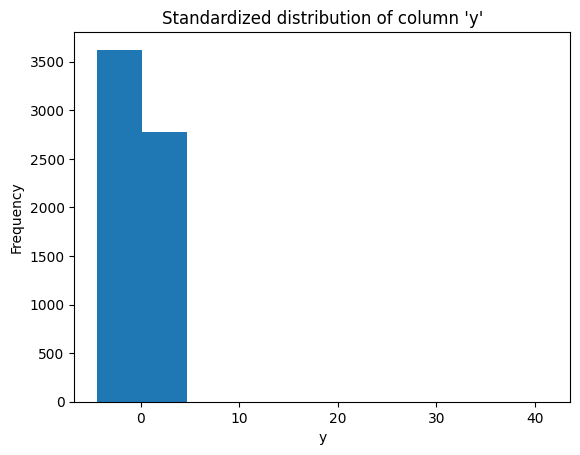

Statistics for column: y
Mean: -1.0491607582707729e-16
Median: -0.018254554678409137
Standard Deviation: 0.9999999922264189
Minimum Value: -4.456969347198062
Maximum Value: 41.32942317108697

Before standardization:


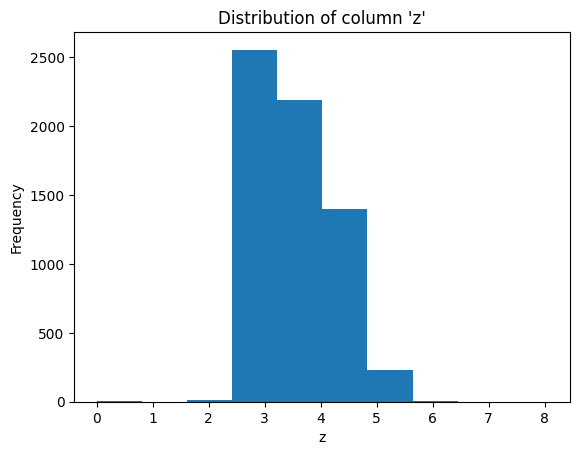

Statistics for column: z
Mean: 3.5344359375
Median: 3.53
Standard Deviation: 0.6896209036407605
Minimum Value: 0.0
Maximum Value: 8.06

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


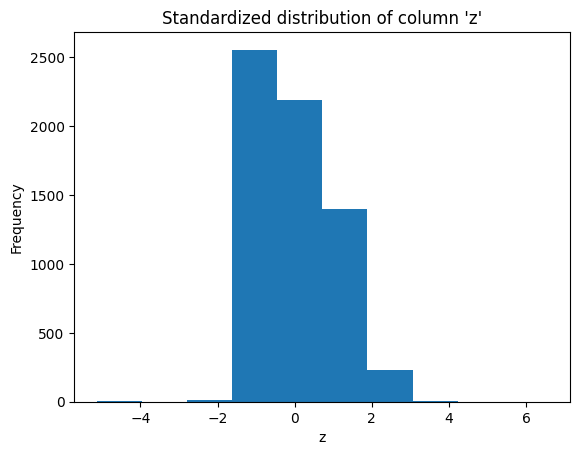

Statistics for column: z
Mean: -8.298917109073046e-17
Median: -0.006432428907327261
Standard Deviation: 0.9999999854992796
Minimum Value: -5.125186704156669
Maximum Value: 6.562393878990555

Before standardization:


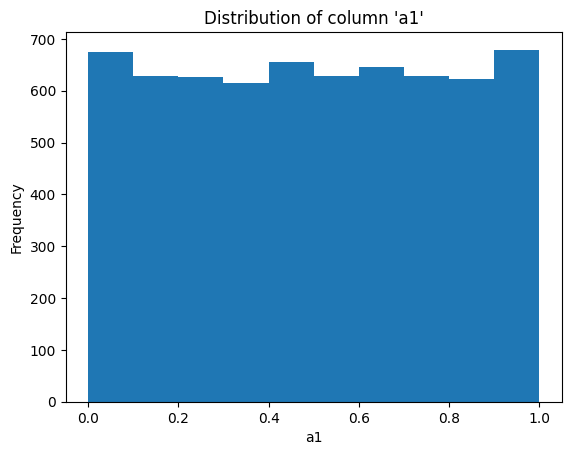

Statistics for column: a1
Mean: 0.5006273312531629
Median: 0.500130825792439
Standard Deviation: 0.2906486224898751
Minimum Value: 0.0001277322880923
Maximum Value: 0.999462528852746

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


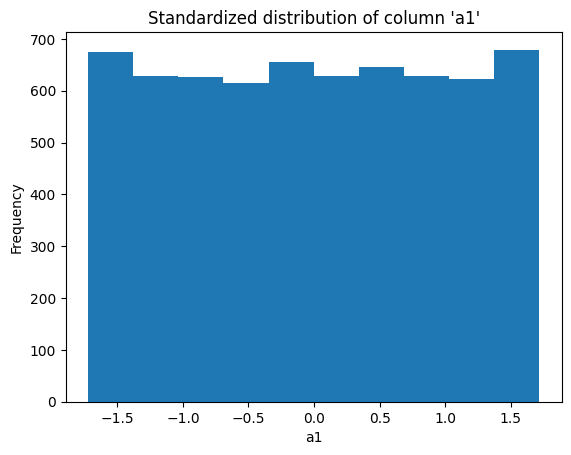

Statistics for column: a1
Mean: 2.6506574712925614e-16
Median: -0.0017082669767637423
Standard Deviation: 0.9999999655941956
Minimum Value: -1.7220091306726029
Maximum Value: 1.7162826238893805

Before standardization:


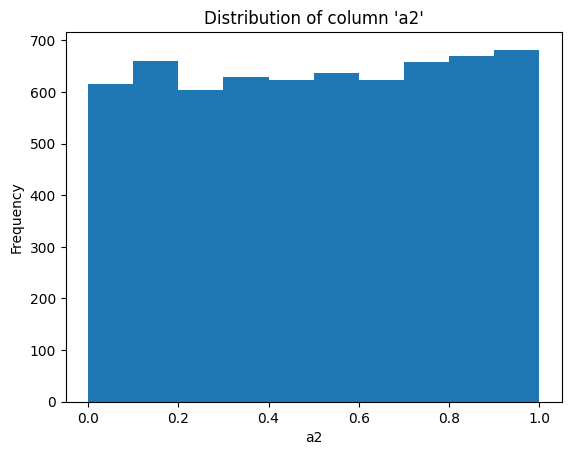

Statistics for column: a2
Mean: 0.507055191086547
Median: 0.5109497681260109
Standard Deviation: 0.2903440122235579
Minimum Value: 0.0001012263819575
Maximum Value: 0.999976135091856

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


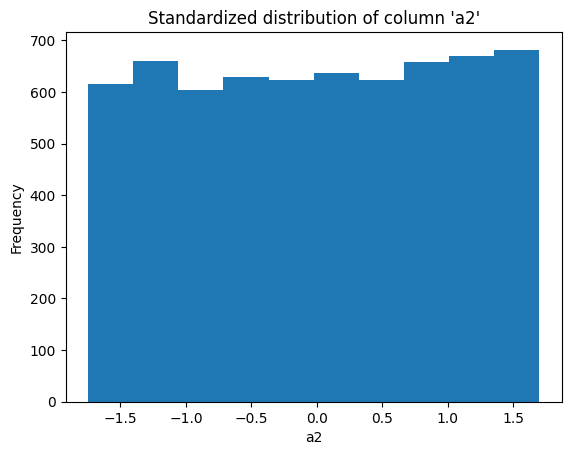

Statistics for column: a2
Mean: 1.9095836023552692e-16
Median: 0.013413663589964556
Standard Deviation: 0.9999999655580993
Minimum Value: -1.7460458142797481
Maximum Value: 1.6977134236494522

Before standardization:


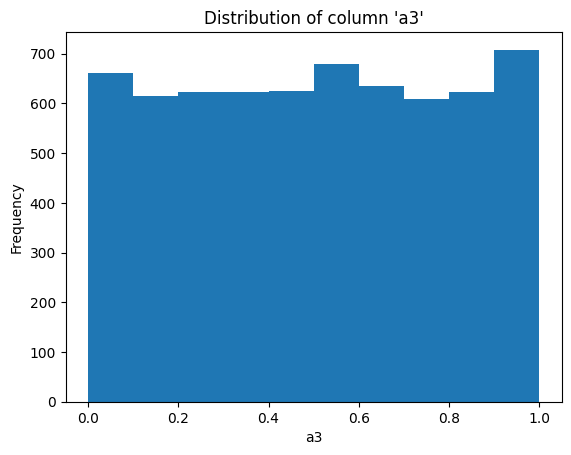

Statistics for column: a3
Mean: 0.5048804837598436
Median: 0.50758603552822
Standard Deviation: 0.2909516285038741
Minimum Value: 0.0001761061139404
Maximum Value: 0.99989625881426

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


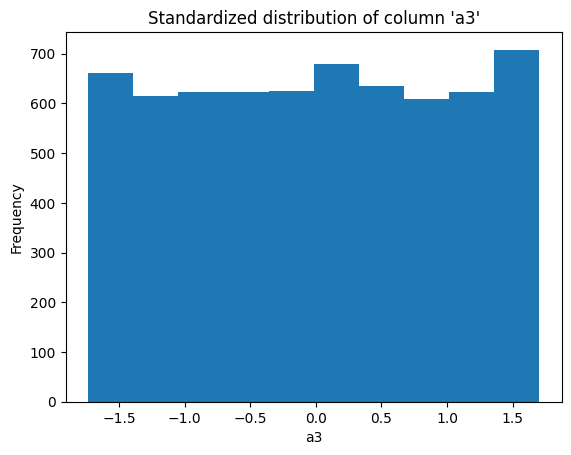

Statistics for column: a3
Mean: 1.3267165144270621e-16
Median: 0.009298974160409704
Standard Deviation: 0.9999999656300268
Minimum Value: -1.7346675902606505
Maximum Value: 1.7013678891786859

Before standardization:


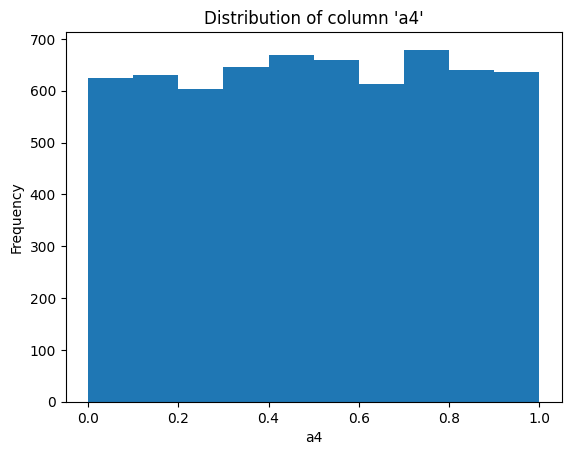

Statistics for column: a4
Mean: 0.5031653819520215
Median: 0.5049586204113435
Standard Deviation: 0.2871129337752799
Minimum Value: 0.0001009085681289
Maximum Value: 0.999872367363423

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


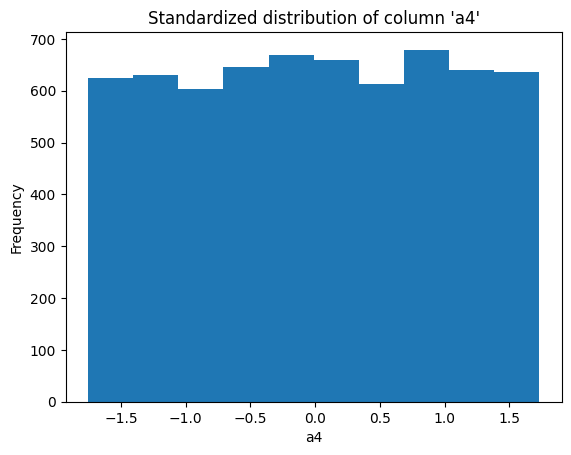

Statistics for column: a4
Mean: 1.6653345369377348e-16
Median: 0.006245759719999066
Standard Deviation: 0.999999965170501
Minimum Value: -1.7521483593496068
Maximum Value: 1.7300055472252358

Before standardization:


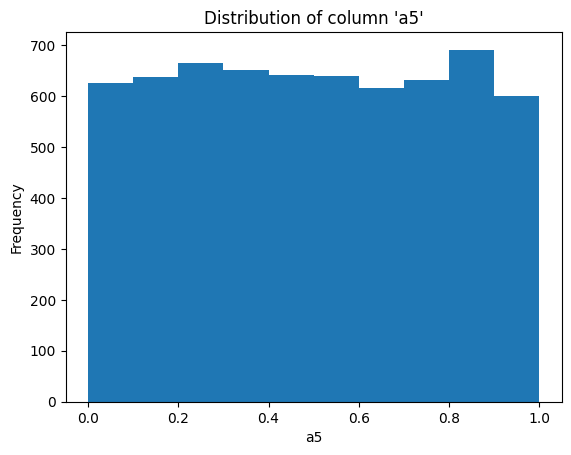

Statistics for column: a5
Mean: 0.4983893510545386
Median: 0.496376514318399
Standard Deviation: 0.2879716748032377
Minimum Value: 0.0001657167449593
Maximum Value: 0.999946979805827

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


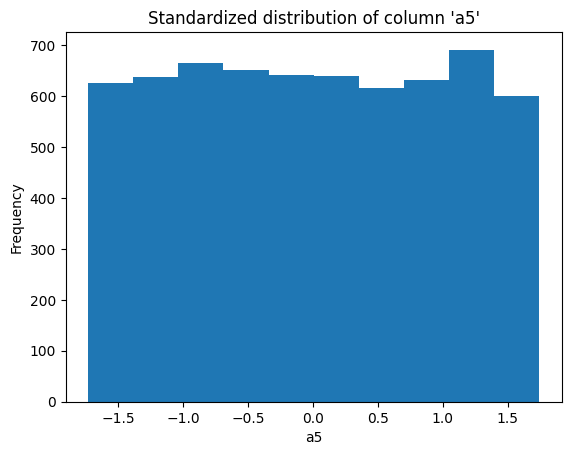

Statistics for column: a5
Mean: 8.659739592076221e-17
Median: -0.006989703649214311
Standard Deviation: 0.9999999652743637
Minimum Value: -1.730113273636609
Maximum Value: 1.7416907814877267

Before standardization:


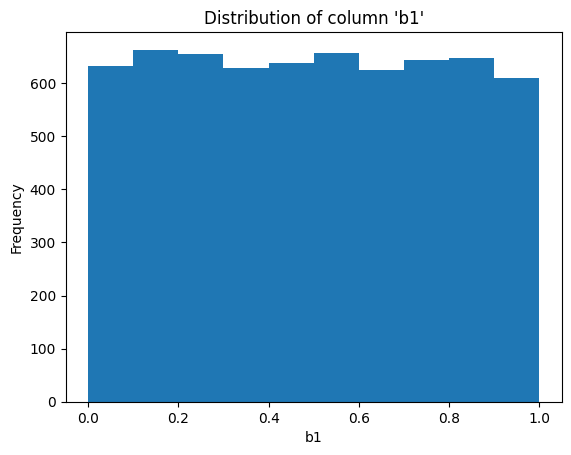

Statistics for column: b1
Mean: 0.49688086032016143
Median: 0.4963829338084905
Standard Deviation: 0.2872437871969738
Minimum Value: 0.0002307298127561
Maximum Value: 0.999390348792076

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


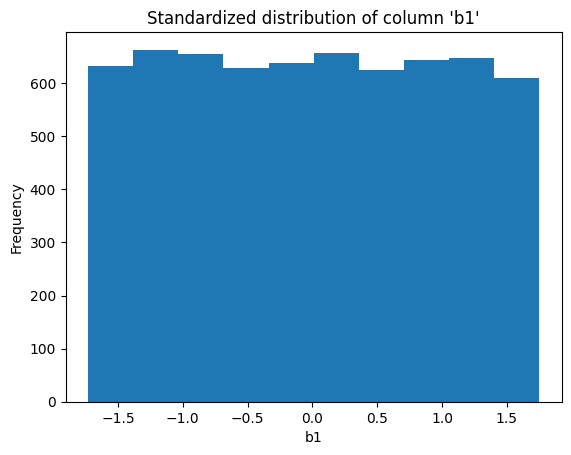

Statistics for column: b1
Mean: 1.3711254354120684e-16
Median: -0.001733463060055186
Standard Deviation: 0.9999999651863675
Minimum Value: -1.7290195135765936
Maximum Value: 1.749418067076049

Before standardization:


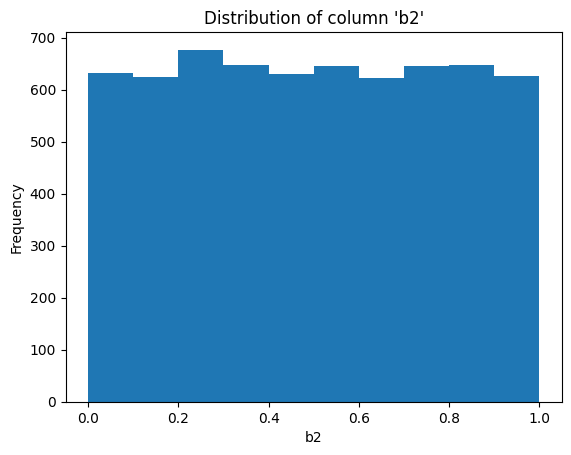

Statistics for column: b2
Mean: 0.4992067723103173
Median: 0.49857304524630297
Standard Deviation: 0.28820901229798945
Minimum Value: 4.75924462080002e-05
Maximum Value: 0.999754969729111

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


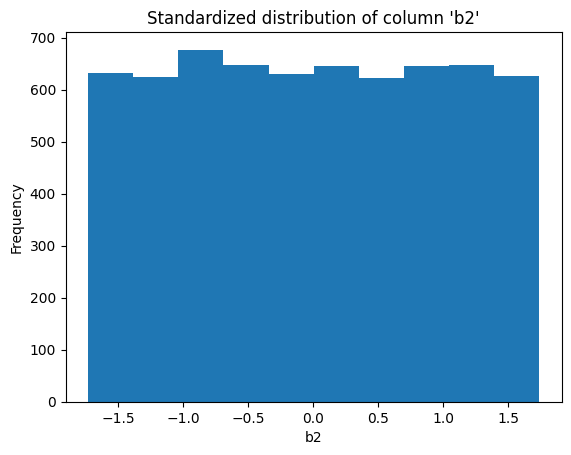

Statistics for column: b2
Mean: 1.9317880628477724e-16
Median: -0.00219884533440824
Standard Deviation: 0.99999996530296
Minimum Value: -1.7319346073351272
Maximum Value: 1.7367540871127183

Before standardization:


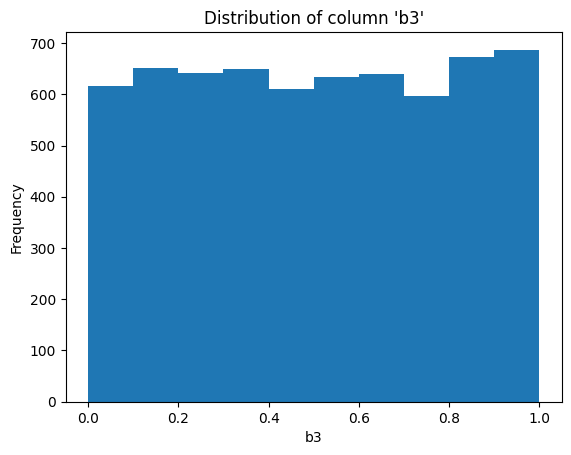

Statistics for column: b3
Mean: 0.5039916080458715
Median: 0.5050767607754101
Standard Deviation: 0.29090375427879245
Minimum Value: 0.0001280894502997
Maximum Value: 0.999796415679157

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


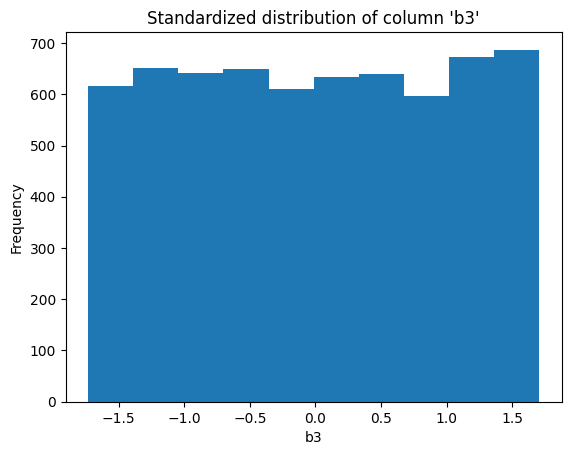

Statistics for column: b3
Mean: 2.1649348980190552e-16
Median: 0.003730280810318235
Standard Deviation: 0.9999999656243704
Minimum Value: -1.7320625597429047
Maximum Value: 1.704360233572374

Before standardization:


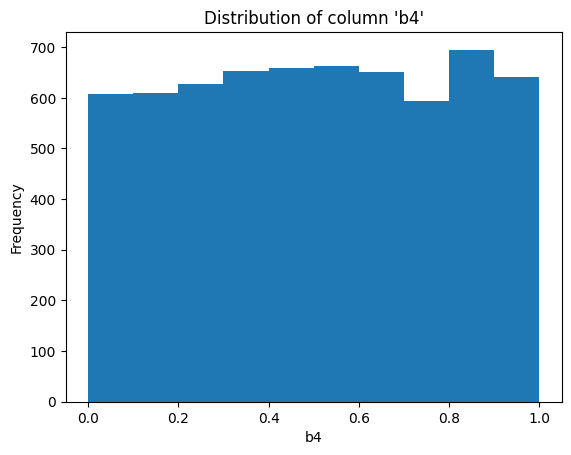

Statistics for column: b4
Mean: 0.5053340221746112
Median: 0.506335903541185
Standard Deviation: 0.28639842529180687
Minimum Value: 3.2366719096899e-05
Maximum Value: 0.999843736179173

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


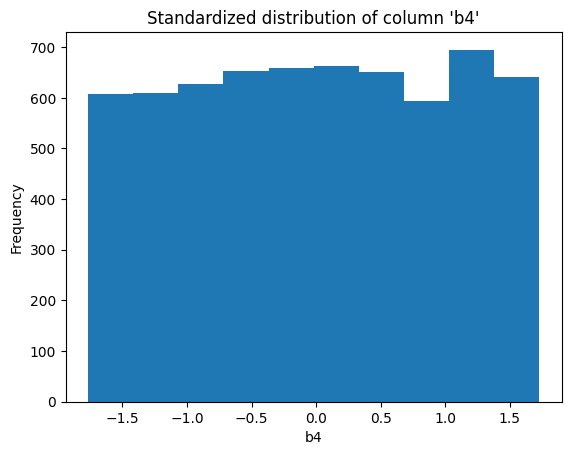

Statistics for column: b4
Mean: -5.10702591327572e-17
Median: 0.0034982082410923523
Standard Deviation: 0.9999999650836082
Minimum Value: -1.7643310618672563
Maximum Value: 1.7266494961842707

Before standardization:


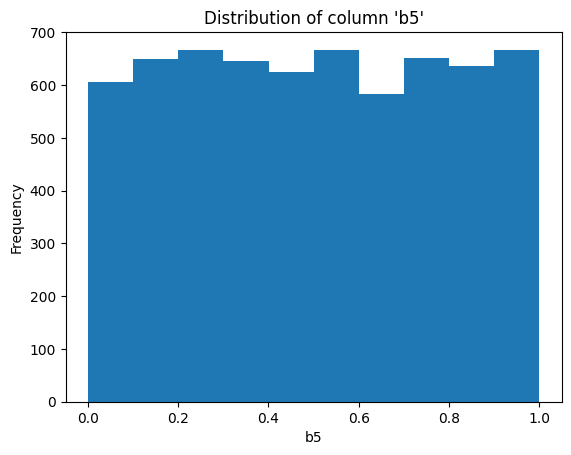

Statistics for column: b5
Mean: 0.501581576463177
Median: 0.5013480264460665
Standard Deviation: 0.28890991179817904
Minimum Value: 0.0003407364711165
Maximum Value: 0.999867933103815

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


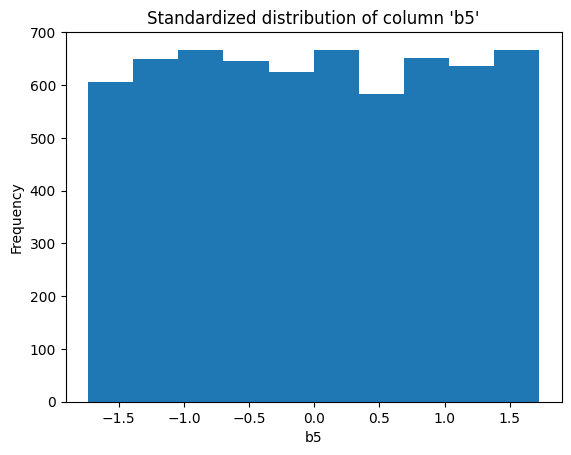

Statistics for column: b5
Mean: 1.6986412276764895e-16
Median: -0.0008083835115697783
Standard Deviation: 0.9999999653871355
Minimum Value: -1.7349381318313026
Maximum Value: 1.7247118186156343

Before standardization:


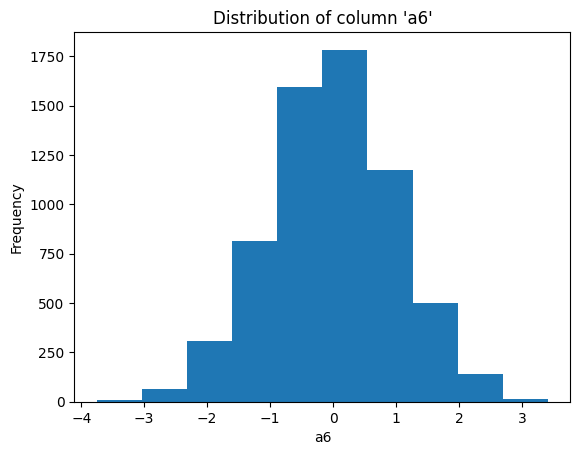

Statistics for column: a6
Mean: -0.012169043653997931
Median: -0.01586543251610345
Standard Deviation: 0.9987873238378547
Minimum Value: -3.75068753032843
Maximum Value: 3.41019319258906

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


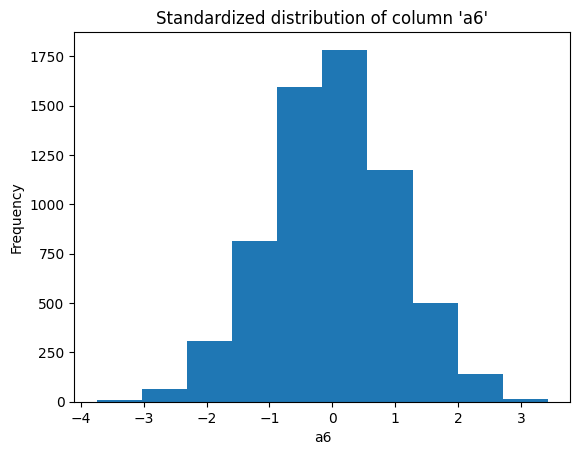

Statistics for column: a6
Mean: -1.5543122344752193e-17
Median: -0.0037008767901592137
Standard Deviation: 0.9999999899878586
Minimum Value: -3.7430575659275944
Maximum Value: 3.4265174580183966

Before standardization:


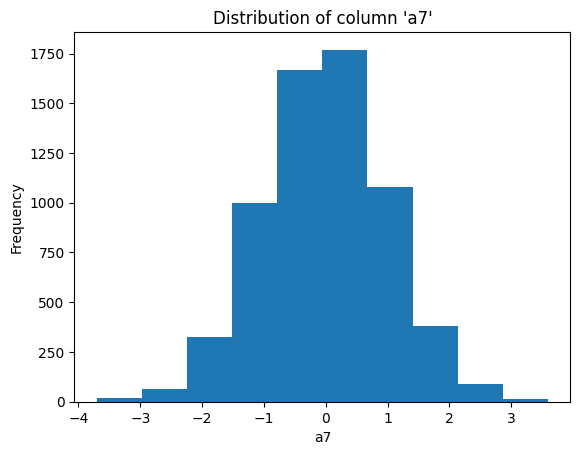

Statistics for column: a7
Mean: -0.010381370032408443
Median: -0.0071535332976002
Standard Deviation: 0.9940969577247267
Minimum Value: -3.70125162705897
Maximum Value: 3.59320909691285

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


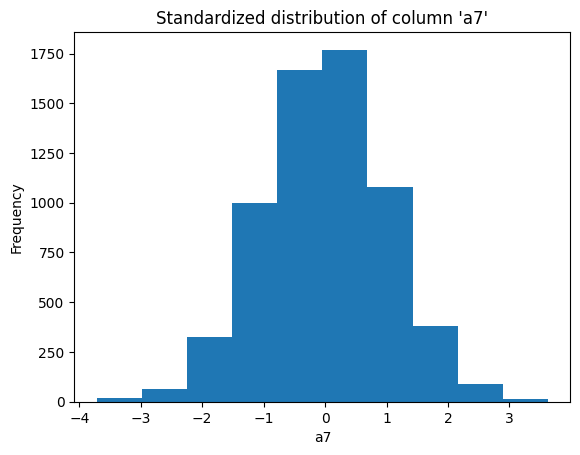

Statistics for column: a7
Mean: 1.0269562977782698e-17
Median: 0.0032470039036494236
Standard Deviation: 0.9999999899406192
Minimum Value: -3.7127869582724573
Maximum Value: 3.6249888933803898

Before standardization:


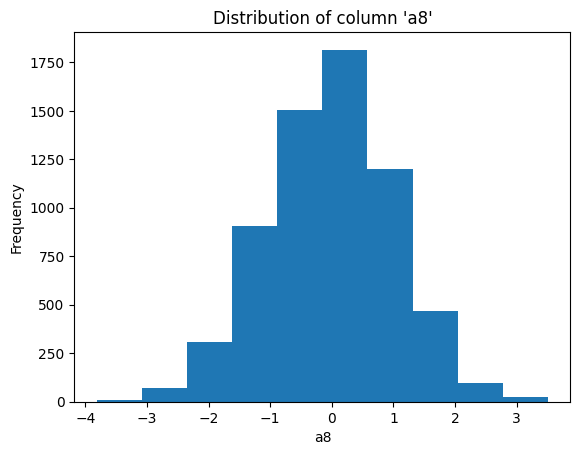

Statistics for column: a8
Mean: -0.016827386789678486
Median: 0.00329725224132155
Standard Deviation: 1.0174895917795048
Minimum Value: -3.81071336032503
Maximum Value: 3.50486250547079

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


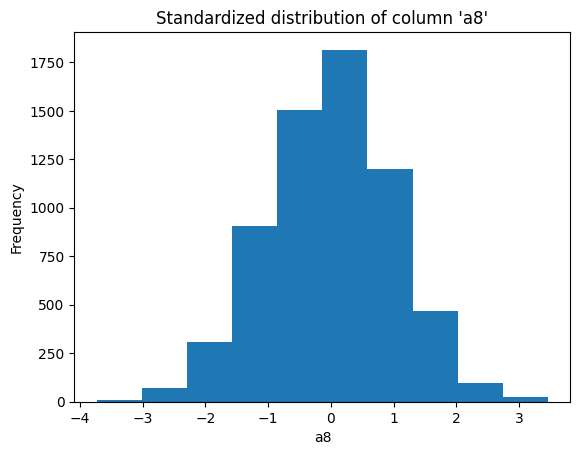

Statistics for column: a8
Mean: -1.5543122344752193e-17
Median: 0.019778717144434414
Standard Deviation: 0.9999999901718898
Minimum Value: -3.728672968156294
Maximum Value: 3.461155658103361

Before standardization:


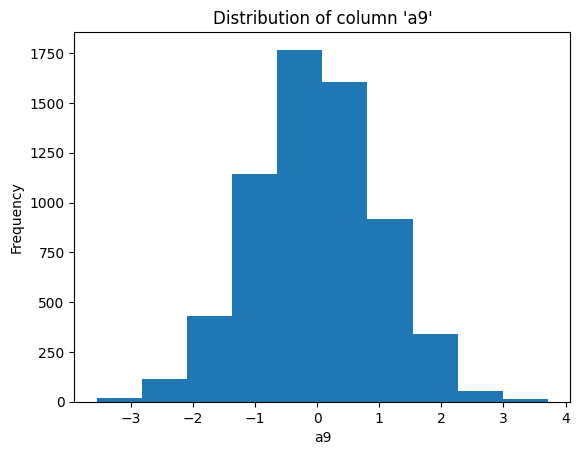

Statistics for column: a9
Mean: -0.015752132149450034
Median: -0.0213828090099607
Standard Deviation: 1.0070381153451289
Minimum Value: -3.54837905652903
Maximum Value: 3.71498492360716

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


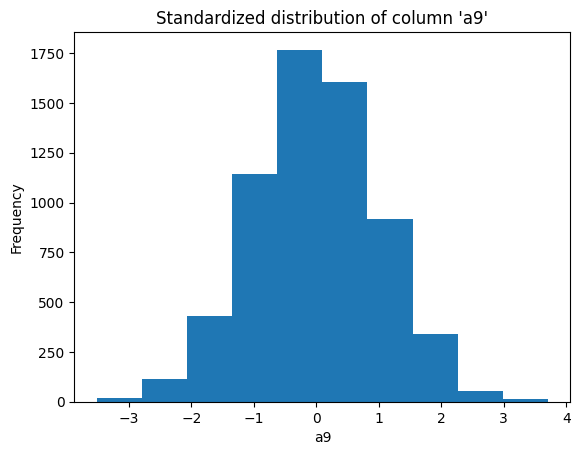

Statistics for column: a9
Mean: 1.1102230246251566e-18
Median: -0.005591324418408625
Standard Deviation: 0.9999999900698895
Minimum Value: -3.507937619709174
Maximum Value: 3.7046631719906573

Before standardization:


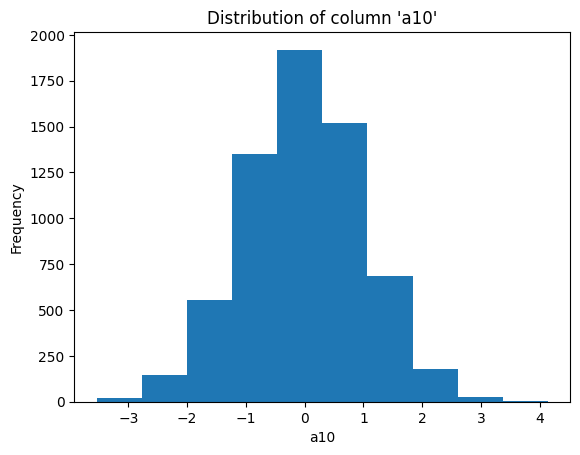

Statistics for column: a10
Mean: -0.015886461266615564
Median: -0.026207437716841697
Standard Deviation: 1.0039628283673188
Minimum Value: -3.53243017513935
Maximum Value: 4.13568465264953

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


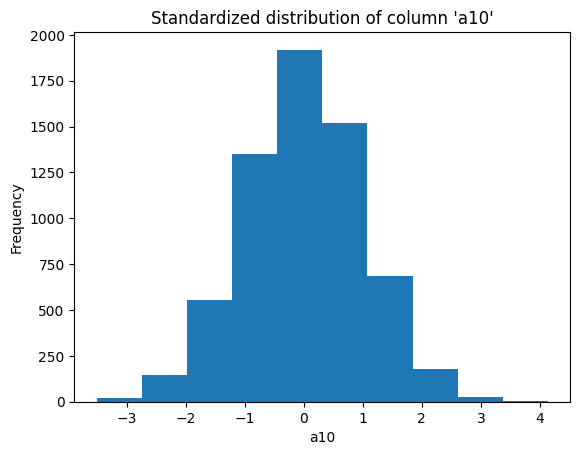

Statistics for column: a10
Mean: 1.3322676295501878e-17
Median: -0.01028023753051506
Standard Deviation: 0.999999990039472
Minimum Value: -3.502663225654315
Maximum Value: 4.135184047915143

Before standardization:


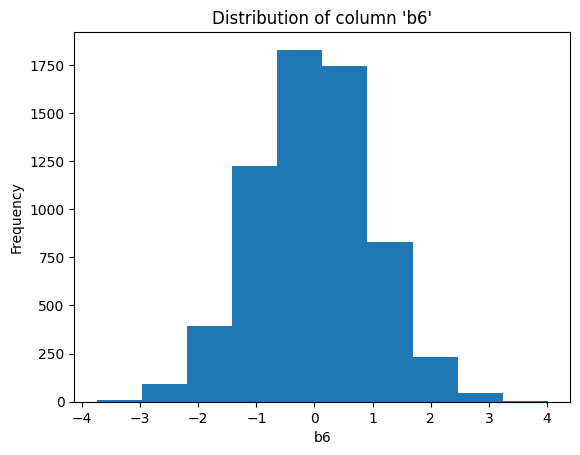

Statistics for column: b6
Mean: -0.009580794511338166
Median: 0.0051911624801674
Standard Deviation: 0.9933638034686818
Minimum Value: -3.74025441070399
Maximum Value: 4.01251273597352

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


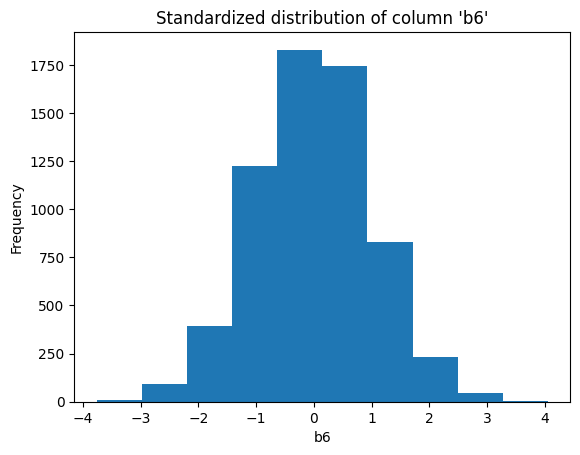

Statistics for column: b6
Mean: 1.2212453270876722e-17
Median: 0.014870641341286676
Standard Deviation: 0.9999999899331948
Minimum Value: -3.7555964548030825
Maximum Value: 4.048963205575501

Before standardization:


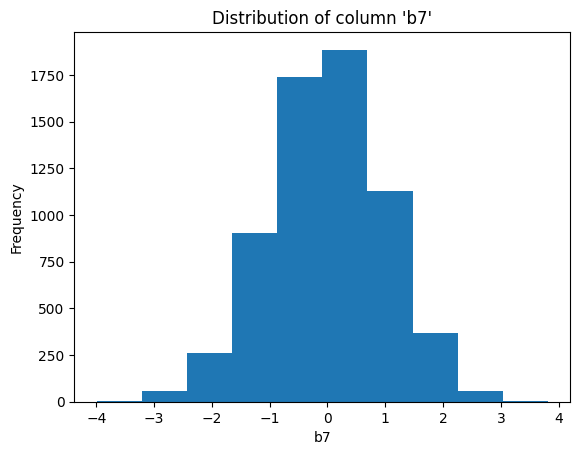

Statistics for column: b7
Mean: -0.0017616780989120472
Median: 0.023144182368327
Standard Deviation: 0.9949288530372413
Minimum Value: -3.98784457289897
Maximum Value: 3.81265243377099

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


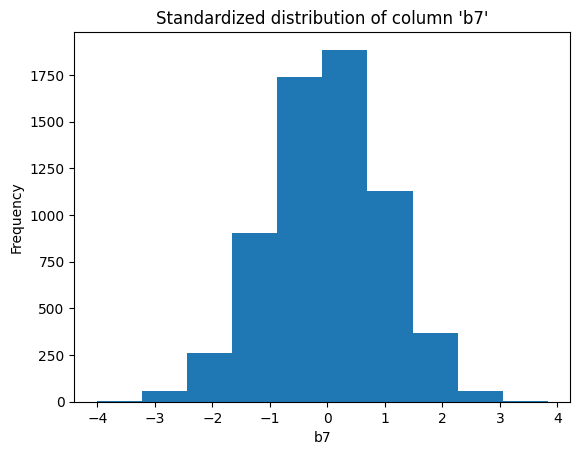

Statistics for column: b7
Mean: -2.7755575615628915e-18
Median: 0.025032805251230097
Standard Deviation: 0.9999999899490302
Minimum Value: -4.006399897407393
Maximum Value: 3.8338561213568134

Before standardization:


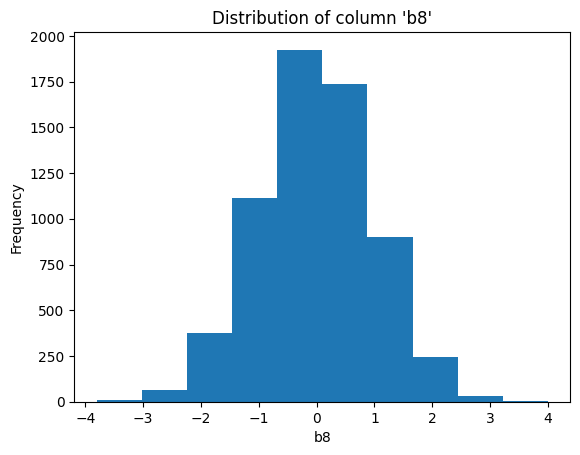

Statistics for column: b8
Mean: -0.008078908103836569
Median: -0.00586654016696725
Standard Deviation: 0.980871975502644
Minimum Value: -3.79742549692231
Maximum Value: 3.99653130671913

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


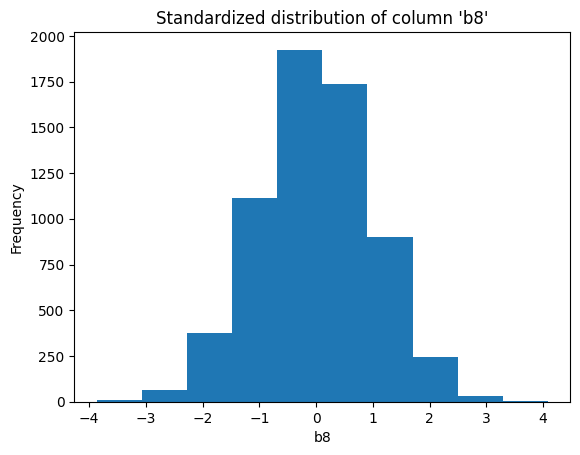

Statistics for column: b8
Mean: 3.885780586188048e-18
Median: 0.002255511391464198
Standard Deviation: 0.9999999898049896
Minimum Value: -3.863242752189153
Maximum Value: 4.082704240728029

Before standardization:


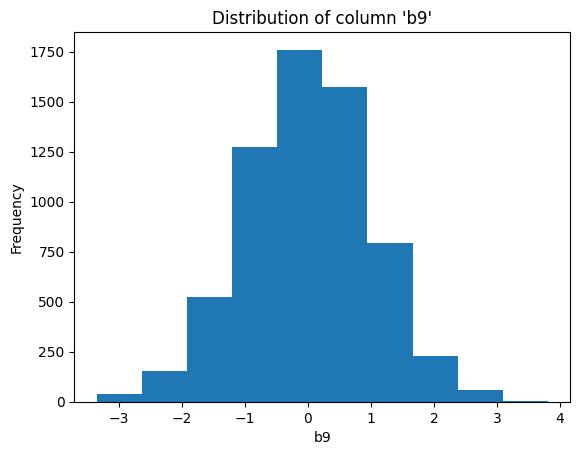

Statistics for column: b9
Mean: 0.003466130174581284
Median: -0.002679772295233
Standard Deviation: 1.0002414950593608
Minimum Value: -3.34620073497575
Maximum Value: 3.80816944730712

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


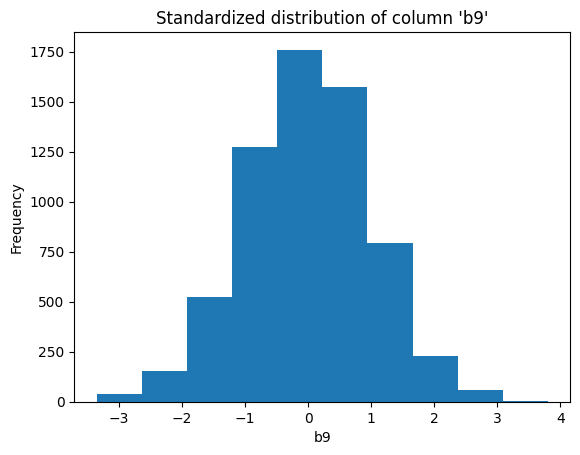

Statistics for column: b9
Mean: -1.9706458687096528e-17
Median: -0.006144418561644817
Standard Deviation: 0.9999999900024146
Minimum Value: -3.3488580989763475
Maximum Value: 3.8037846838866614

Before standardization:


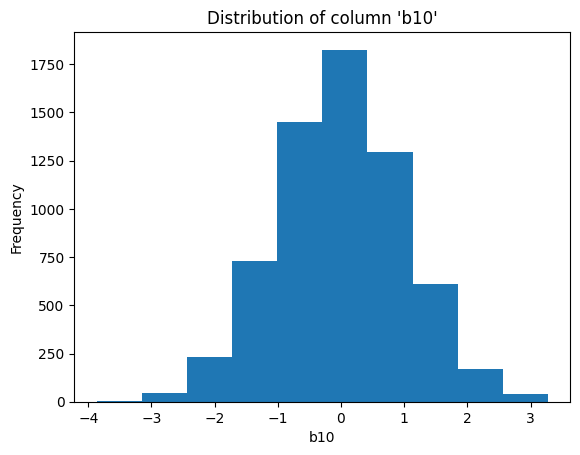

Statistics for column: b10
Mean: -0.004042369009506924
Median: -0.0162564895418166
Standard Deviation: 1.0046243082219906
Minimum Value: -3.86240698430107
Maximum Value: 3.27383545136609

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_4536\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


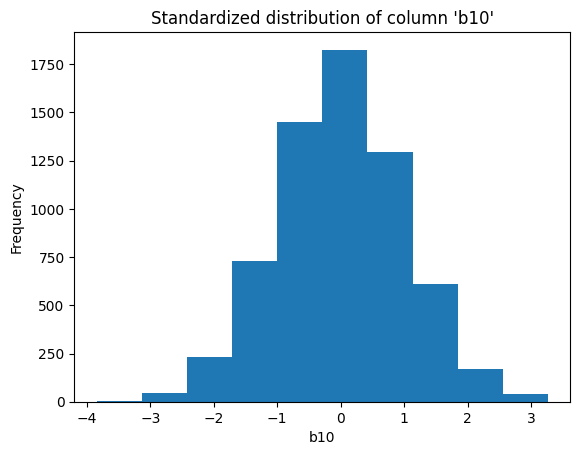

Statistics for column: b10
Mean: -9.992007221626408e-18
Median: -0.012157898540547512
Standard Deviation: 0.9999999900460302
Minimum Value: -3.840604438204516
Maximum Value: 3.262789642775986



In [18]:
for fold in range(NUM_FOLDS):
    training_data = kfold_data[fold]["train"]
    for column in numeric_columns:
        mean = training_data[column].mean()
        std = training_data[column].std()
        print("Before standardization:")
        plot_distribution(training_data[column], column, f"Distribution of column '{column}'")
        print_statistics(training_data[column], column)
        
        print("After standardization:")
        training_data[column] = (training_data[column] - mean) / (std + 1e-8)
        plot_distribution(training_data[column], column, f"Standardized distribution of column '{column}'")
        print_statistics(training_data[column], column)
    
    break # Temporary break to only show the first fold